# Importing all required Libraries:

In [1]:
# importing All required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the data from csv file
df = pd.read_csv(r"C:\Users\mouni\Desktop\loan_dataset.csv")

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [4]:
# showing all the information of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


# Data Cleaning:

1. Dropping Duplicates

2. Handling Missing Values

# Handling Missing Values:
    
1. Deleting Rows:

  i. Dropping the Rows with null values

  ii. Dropping Coloumn if it has more than 70-75% of missing values.

  iii. Used only when there are enough samples in the dataset.

  iv. Removing the data will lead to loss of information.

  v. Works poorly if the percentage of missing values is high (say 30%), compared to the wholedataset

2. Replacing with Mean/Median/Mode:

    i. Mean - If there is no outlier in the data.
    ii. Median - Outlier
    iii. Mode - Used for Categorical data

- This is a better approach when the data size is small.

- It can prevent data loss which results in removal of the rows and columns.

3. Assigning an Unique Category:

- A new category can be assigned to the missing category.

4. Predicting the Missing Values:

-  Using the features which do not have missing values, we can predict the nulls with the help of a machine learning algorithm.

- This method may result in better accuracy.

In [157]:
# Checking how many duplicate rows are present
df.duplicated().sum()

0

In [158]:
# If any Duplicates Present, Dropping those Duplicates
df.drop_duplicates(inplace=True)

In [159]:

# again checking for Duplicates
df.duplicated().sum()

0

In [160]:
# checkng null values in each column
df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [9]:
df1 = df.copy()

In [10]:
# Handling With Null Values

In [11]:
# 1. Deleting the Rows which are having null values.
# Here, I Deleted the Rows which are having null values due to large data.

In [12]:
df1.dropna(inplace = True)

In [13]:
# agian checking for null values. It is showing zero nulls because in above step dropped the null value rows
df1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [14]:
# showing all the information of a DataFrame
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            289 non-null    object 
 1   Gender             289 non-null    object 
 2   Married            289 non-null    object 
 3   Dependents         289 non-null    object 
 4   Education          289 non-null    object 
 5   Self_Employed      289 non-null    object 
 6   ApplicantIncome    289 non-null    int64  
 7   CoapplicantIncome  289 non-null    int64  
 8   LoanAmount         289 non-null    float64
 9   Loan_Amount_Term   289 non-null    float64
 10  Credit_History     289 non-null    float64
 11  Property_Area      289 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 29.4+ KB


In [15]:
df2 = df.copy()

In [16]:
# 2. Replacing Null Values by Mean/Median/Mode

In [17]:
# Imputing null values with Mode in Gender Column

In [18]:
df2["Gender"].mode()

0    Male
Name: Gender, dtype: object

In [19]:
df2["Gender"].mode()[0]

'Male'

In [20]:
df2["Gender"] = df2["Gender"].fillna(df2["Gender"].mode()[0])

In [21]:
df2.head(15)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [22]:
# Imputing null values with Mode in Self_Employed Column

In [23]:
df2["Self_Employed"].mode()

0    No
Name: Self_Employed, dtype: object

In [24]:
df2["Self_Employed"].mode()[0]

'No'

In [25]:
df2["Self_Employed"] = df2["Self_Employed"].fillna(df2["Self_Employed"].mode()[0])

In [26]:
df2.tail(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
347,LP002885,Male,No,0,Not Graduate,No,2868,0,70.0,360.0,1.0,Urban
348,LP002890,Male,Yes,2,Not Graduate,No,3418,1380,135.0,360.0,1.0,Urban
349,LP002891,Male,Yes,0,Graduate,Yes,2500,296,137.0,300.0,1.0,Rural
350,LP002899,Male,Yes,2,Graduate,No,8667,0,254.0,360.0,1.0,Rural
351,LP002901,Male,No,0,Graduate,No,2283,15000,106.0,360.0,NaN,Rural
352,LP002907,Male,Yes,0,Graduate,No,5817,910,109.0,360.0,1.0,Urban
353,LP002920,Male,Yes,0,Graduate,No,5119,3769,120.0,360.0,1.0,Rural
354,LP002921,Male,Yes,3+,Not Graduate,No,5316,187,158.0,180.0,0.0,Semiurban
355,LP002932,Male,Yes,3+,Graduate,No,7603,1213,197.0,360.0,1.0,Urban
356,LP002935,Male,Yes,1,Graduate,No,3791,1936,85.0,360.0,1.0,Urban


In [27]:
df2["LoanAmount"].max()

550.0

In [28]:
df2["LoanAmount"].min()

28.0

In [29]:
df2["LoanAmount"].mean()

136.13259668508286

In [30]:
df2["LoanAmount"].median()

125.0

In [31]:
# Imputing null values with Median in LoanAmount Column

In [32]:
df2["LoanAmount"] = df2["LoanAmount"].fillna(df2["LoanAmount"].median())

In [33]:
df2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [34]:
df2["Loan_Amount_Term"].max()

480.0

In [35]:
df2["Loan_Amount_Term"].min()

6.0

In [36]:
df2["Loan_Amount_Term"].mean()

342.53739612188366

In [37]:
df2["Loan_Amount_Term"].median()

360.0

In [38]:
# Imputing null values with Median in Loan_Amount_Term Column

In [39]:
df2["Loan_Amount_Term"] = df2["Loan_Amount_Term"].fillna(df2["Loan_Amount_Term"].median())

In [40]:
df2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [41]:
df2["Credit_History"].min()

0.0

In [42]:
df2["Credit_History"].max()

1.0

In [43]:
df2["Credit_History"].median()

1.0

In [44]:
df2["Credit_History"].mean()

0.8254437869822485

In [45]:
df2["Credit_History"].mode()

0    1.0
Name: Credit_History, dtype: float64

In [46]:
df2["Credit_History"] = df2["Credit_History"].mode()[0]

In [47]:
# Imputing null values with Mode in Credit_History Column

In [48]:
df2["Credit_History"] = df2["Credit_History"].fillna(df2["Credit_History"].mode()[0])

In [49]:
df2.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,1.0,Rural
8,LP001059,Male,Yes,2,Graduate,No,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [50]:
df2['Dependents'].value_counts()

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [51]:
# Top 5 Records
df2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [52]:
# it gives an information about dataframe
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 37.3+ KB


In [53]:
# 3. Forward Fill and Backward Fill

In [54]:
df3 = df.copy()

In [55]:
df3.head() 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [56]:
df.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [57]:
df3["Loan_Amount_Term"] = df3["Loan_Amount_Term"].fillna(method = "ffill")

In [58]:
df3.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [59]:
df3["Credit_History"] = df3["Credit_History"].fillna(method = "bfill")

In [60]:
df3.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [61]:
df3

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [62]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 37.3+ KB


In [63]:
df1.to_csv("dropping rows.csv")

In [64]:
df2.to_excel("loan_sanction.xlsx")

In [65]:
df3.to_csv("ffill.csv")

In [66]:
df2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [150]:
df4 = df2[['Gender','Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']]

In [151]:
df4

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban
365,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [152]:
df4.to_excel("bank_loan_sanction.xlsx")

# Data Exploration:

In [67]:
# it shows number of Rows and Columns in a DataFrame
df2.shape

(367, 12)

In [68]:
df2.size

4404

In [69]:
df2.ndim

2

In [70]:
# All Column names in a DF
df2.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [71]:
# gives an information about the DF
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 37.3+ KB


In [72]:
# It returns the Description of all the numeric columns
df2.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,367.000000,367.000000,367.0
mean,4805.599455,1569.577657,135.980926,342.822888,1.0
std,4910.685399,2334.232099,60.959739,64.658402,0.0
min,0.000000,0.000000,28.000000,6.000000,1.0
25%,2864.000000,0.000000,101.000000,360.000000,1.0
50%,3786.000000,1025.000000,125.000000,360.000000,1.0
75%,5060.000000,2430.500000,157.500000,360.000000,1.0
max,72529.000000,24000.000000,550.000000,480.000000,1.0


In [73]:
df2.count()

Loan_ID              367
Gender               367
Married              367
Dependents           357
Education            367
Self_Employed        367
ApplicantIncome      367
CoapplicantIncome    367
LoanAmount           367
Loan_Amount_Term     367
Credit_History       367
Property_Area        367
dtype: int64

In [74]:
df2.LoanAmount

0      110.0
1      126.0
2      208.0
3      100.0
4       78.0
       ...  
362    113.0
363    115.0
364    126.0
365    158.0
366     98.0
Name: LoanAmount, Length: 367, dtype: float64

In [75]:
df2.LoanAmount.value_counts()

125.0    16
150.0    12
110.0    10
100.0     9
90.0      9
         ..
71.0      1
157.0     1
93.0      1
61.0      1
98.0      1
Name: LoanAmount, Length: 144, dtype: int64

In [76]:
df2.ApplicantIncome.value_counts()

5000    6
3500    6
3333    5
7500    4
2500    4
       ..
724     1
1762    1
4243    1
4167    1
9200    1
Name: ApplicantIncome, Length: 314, dtype: int64

In [77]:
df2.CoapplicantIncome.value_counts()

0       156
700       3
2000      3
1250      2
1760      2
       ... 
1270      1
2925      1
2999      1
528       1
2393      1
Name: CoapplicantIncome, Length: 194, dtype: int64

In [78]:
df2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [79]:
# last 5 Records in a DF
df2.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural
366,LP002989,Male,No,0,Graduate,Yes,9200,0,98.0,180.0,1.0,Rural


In [80]:
# displays numeric data type columns in a DF
df2.select_dtypes(include = 'number')

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5720,0,110.0,360.0,1.0
1,3076,1500,126.0,360.0,1.0
2,5000,1800,208.0,360.0,1.0
3,2340,2546,100.0,360.0,1.0
4,3276,0,78.0,360.0,1.0
...,...,...,...,...,...
362,4009,1777,113.0,360.0,1.0
363,4158,709,115.0,360.0,1.0
364,3250,1993,126.0,360.0,1.0
365,5000,2393,158.0,360.0,1.0


In [81]:
# displays float data type columns in a DF
df2.select_dtypes(include = 'float')

,LoanAmount,Loan_Amount_Term,Credit_History
0,110.0,360.0,1.0
1,126.0,360.0,1.0
2,208.0,360.0,1.0
3,100.0,360.0,1.0
4,78.0,360.0,1.0
...,...,...,...
362,113.0,360.0,1.0
363,115.0,360.0,1.0
364,126.0,360.0,1.0
365,158.0,360.0,1.0


In [82]:
# displays int data type columns in a DF
df2.select_dtypes(include = 'int')

,ApplicantIncome,CoapplicantIncome
0,5720,0
1,3076,1500
2,5000,1800
3,2340,2546
4,3276,0
...,...,...
362,4009,1777
363,4158,709
364,3250,1993
365,5000,2393


In [83]:
# displays object data type columns in a DF
df2.select_dtypes(include = 'object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,Urban
1,LP001022,Male,Yes,1,Graduate,No,Urban
2,LP001031,Male,Yes,2,Graduate,No,Urban
3,LP001035,Male,Yes,2,Graduate,No,Urban
4,LP001051,Male,No,0,Not Graduate,No,Urban
...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,Urban
363,LP002975,Male,Yes,0,Graduate,No,Urban
364,LP002980,Male,No,0,Graduate,No,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,Rural


In [84]:
# selecting all data types of columns in a DF except object data type.
df2.select_dtypes(exclude = 'object')

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5720,0,110.0,360.0,1.0
1,3076,1500,126.0,360.0,1.0
2,5000,1800,208.0,360.0,1.0
3,2340,2546,100.0,360.0,1.0
4,3276,0,78.0,360.0,1.0
...,...,...,...,...,...
362,4009,1777,113.0,360.0,1.0
363,4158,709,115.0,360.0,1.0
364,3250,1993,126.0,360.0,1.0
365,5000,2393,158.0,360.0,1.0


In [85]:
# extracting all the Records where Self_Employed is equal to Yes.
df2.loc[df2['Self_Employed'] == 'Yes']

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
37,LP001210,Male,Yes,0,Graduate,Yes,2267,2792,90.0,360.0,1.0,Urban
38,LP001211,Male,No,0,Graduate,Yes,5833,0,116.0,360.0,1.0,Urban
49,LP001270,Male,Yes,3+,Not Graduate,Yes,8000,250,187.0,360.0,1.0,Semiurban
54,LP001312,Male,Yes,0,Not Graduate,Yes,5293,0,92.0,360.0,1.0,Urban
61,LP001335,Male,Yes,0,Graduate,Yes,7016,292,125.0,360.0,1.0,Urban
73,LP001380,Male,Yes,0,Graduate,Yes,3900,2094,232.0,360.0,1.0,Rural
77,LP001413,Male,No,0,Graduate,Yes,6356,0,50.0,360.0,1.0,Rural
90,LP001475,Male,Yes,0,Graduate,Yes,3188,2286,130.0,360.0,1.0,Rural
110,LP001584,Female,No,0,Graduate,Yes,4742,0,108.0,360.0,1.0,Semiurban


In [86]:
# extracting all the Records where Married is equal to Yes.
df2.loc[df2['Married'] == 'Yes']

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
360,LP002965,Female,Yes,0,Graduate,No,8550,4255,96.0,360.0,1.0,Urban
361,LP002969,Male,Yes,1,Graduate,No,2269,2167,99.0,360.0,1.0,Semiurban
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban


In [87]:
# extracting all the Records where Gender is equal to Female.
df2.loc[df2['Gender'] == 'Female']

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
14,LP001096,Female,No,0,Graduate,No,4666,0,124.0,360.0,1.0,Semiurban
21,LP001124,Female,No,3+,Not Graduate,No,2083,0,28.0,180.0,1.0,Urban
23,LP001135,Female,No,0,Not Graduate,No,3765,0,125.0,360.0,1.0,Urban
30,LP001177,Female,No,0,Not Graduate,No,2478,0,75.0,360.0,1.0,Semiurban
...,...,...,...,...,...,...,...,...,...,...,...,...
332,LP002826,Female,Yes,1,Not Graduate,No,3621,2717,171.0,360.0,1.0,Urban
333,LP002843,Female,Yes,0,Graduate,No,4709,0,113.0,360.0,1.0,Semiurban
336,LP002853,Female,No,0,Not Graduate,No,3015,2000,145.0,360.0,1.0,Urban
339,LP002858,Female,No,0,Graduate,No,4333,2333,162.0,360.0,1.0,Rural


In [88]:
# extracting all the Records where Education is equal to Graduate in a DF.
df2.loc[df2['Education'] == 'Graduate']

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
8,LP001059,Male,Yes,2,Graduate,No,13633,0,280.0,240.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
361,LP002969,Male,Yes,1,Graduate,No,2269,2167,99.0,360.0,1.0,Semiurban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [89]:
# extracting all the Records where Property_area is equal to urban in a DF.
df2.loc[df2['Property_Area'] == 'Urban']

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
356,LP002935,Male,Yes,1,Graduate,No,3791,1936,85.0,360.0,1.0,Urban
357,LP002952,Male,No,0,Graduate,No,2500,0,60.0,360.0,1.0,Urban
360,LP002965,Female,Yes,0,Graduate,No,8550,4255,96.0,360.0,1.0,Urban
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban


In [90]:
pd.crosstab(df2['Property_Area'], df2['Self_Employed'])

Self_Employed,No,Yes
Property_Area,,
Rural,93,18
Semiurban,108,8
Urban,129,11


In [91]:
pd.crosstab(df2['Property_Area'], df2['Married'])

Married,No,Yes
Property_Area,,
Rural,40,71
Semiurban,45,71
Urban,49,91


In [92]:
pd.crosstab(df2['Married'], df2['Education'])

Education,Graduate,Not Graduate
Married,,
No,107,27
Yes,176,57


In [93]:
pd.crosstab(df2['Education'], df2['Self_Employed'])

Self_Employed,No,Yes
Education,,
Graduate,254,29
Not Graduate,76,8


In [94]:
pd.crosstab(df2['Gender'], df2['Self_Employed'])

Self_Employed,No,Yes
Gender,,
Female,66,4
Male,264,33


In [95]:
pd.crosstab(df2['Gender'], df2['Education'])

Education,Graduate,Not Graduate
Gender,,
Female,56,14
Male,227,70


In [96]:
df2.groupby('Property_Area')['Education'].count()

Property_Area
Rural        111
Semiurban    116
Urban        140
Name: Education, dtype: int64

In [97]:
df2.groupby('Education')['Self_Employed'].count()

Education
Graduate        283
Not Graduate     84
Name: Self_Employed, dtype: int64

In [98]:
df2.groupby('Gender')['Education'].count()

Gender
Female     70
Male      297
Name: Education, dtype: int64

In [99]:
df2.groupby('Gender')['Married'].count()

Gender
Female     70
Male      297
Name: Married, dtype: int64

In [100]:
# number of unique vaues in Gender column
df2.Gender.nunique()

2

In [101]:
# unique vaues in Gender column
df2.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [102]:
# unique vaues in Married column
df2.Married.unique()

array(['Yes', 'No'], dtype=object)

In [103]:
# unique vaues in Education column
df2.Education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [104]:
# unique vaues in Self_Employed column
df2.Self_Employed.unique()

array(['No', 'Yes'], dtype=object)

In [105]:
# unique vaues in Dependent column
df2.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [106]:
# unique vaues in Property_Area column
df2.Property_Area.unique()

array(['Urban', 'Semiurban', 'Rural'], dtype=object)

In [107]:
# unique vaues in Credit_Histery column
df2.Credit_History.unique()

array([1.])

# Exploratory Data Analysis:

# Using Python Libraries - Matplotlib, Seaborn

# Univariate Analysis:

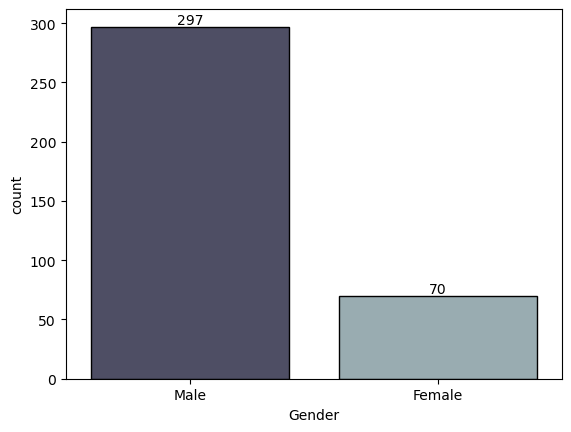

In [108]:
a = sns.countplot(x = 'Gender', data = df2, palette = 'bone', edgecolor = 'k')
for i in a.containers:
    a.bar_label(i);

# Observation:
    
- Males count is moreand therefore, they are taking more loans as compared to females.

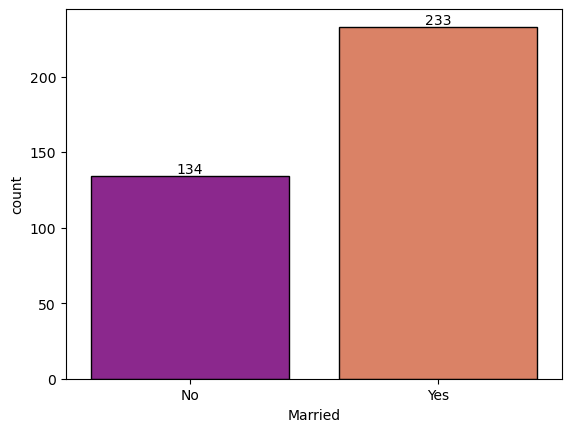

In [109]:
b = sns.countplot(x = 'Married', data = df2, order = ['No', 'Yes'], palette = 'plasma', edgecolor = 'k')
for i in b.containers:
    b.bar_label(i);

# Observation:
    
- Married People are taking more loans as compared to singles.

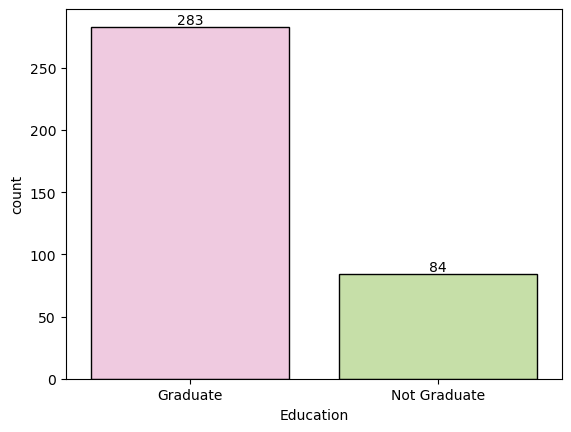

In [110]:
c= sns.countplot(x = 'Education', data = df2,palette = 'PiYG', edgecolor = 'k')
for i in c.containers:
    c.bar_label(i);

# Observation:
    
- Graduates are more in number and they are taking more loans as compared to Non-Graduates.

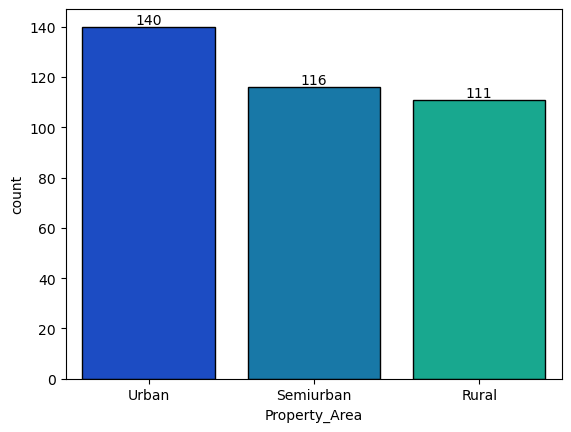

In [111]:
d = sns.countplot(x = 'Property_Area', data = df2, palette = 'winter', edgecolor = 'k')
for i in d.containers:
    d.bar_label(i);

# Observations:
    
- Rural people are taking less loans.
- Urban People are taking more loans as compared to others.

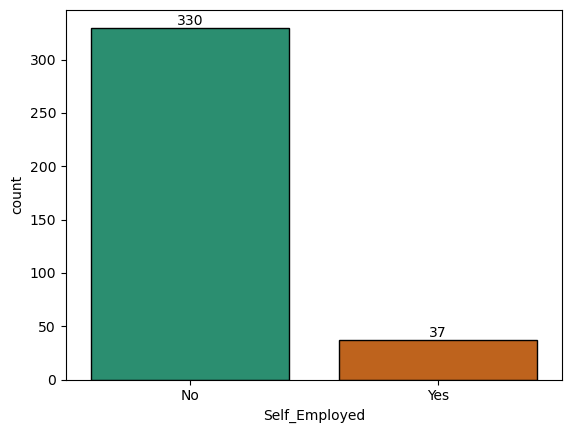

In [112]:
e = sns.countplot(x = 'Self_Employed', data = df2, palette = 'Dark2', edgecolor ='k')
for i in e.containers:
    e.bar_label(i);

# Observations:
    
- Self Employed people are taking less loans.
- Non-self Employed people are taking more loans.


# About Box Plot:
    
- The median is an average. The larger median, the larger the average.
- The range = maximum – minimum. The larger the range, the more spread the data is.
- The IQR = Q3 – Q1. The larger the interquartile range, the more spread the middle 50% of the data is.
- The spread of data refers to how spread out the numbers in the data are. Both the range and interquartile range are used to describe the spread of data.
- The larger the range, the more spread the whole data is.
- The larger the interquartile range, the more spread the middle 50% of data is.

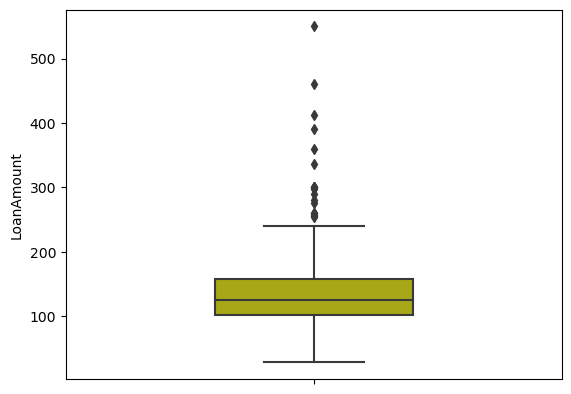

In [140]:
sns.boxplot(y ='LoanAmount', data = df2, width = 0.4, color = 'y');

# Observations:
    
- The Range of the data, it means the difference between maximum and minimum LoanAmount is from approximately from 20 to 220 .
- Approximately, the Inter Quartile Range is in between 100 to 160, it means the middle 50% of the LoanAmount data is in between 100 to 160.
- Approximately, above 220 of the LoanAmount all data points are considered as Outliers.

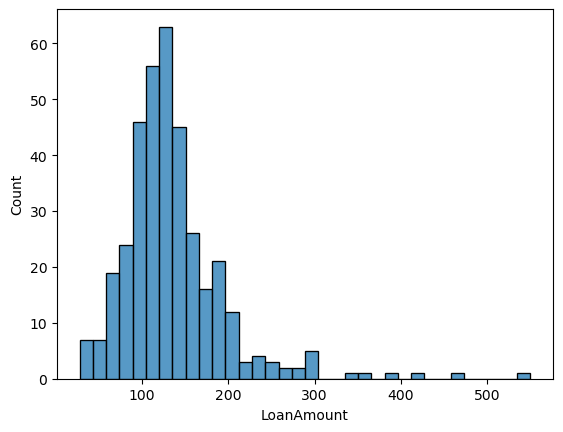

In [141]:
sns.histplot(x = 'LoanAmount', data = df2);

# Observations:
    
- Loan Amount follows Right-skewed Distribution (or) Positive Skew.
- Most of the Loan amount is under 200 only.
- Loan Amount has huge number of Outliers on right side.

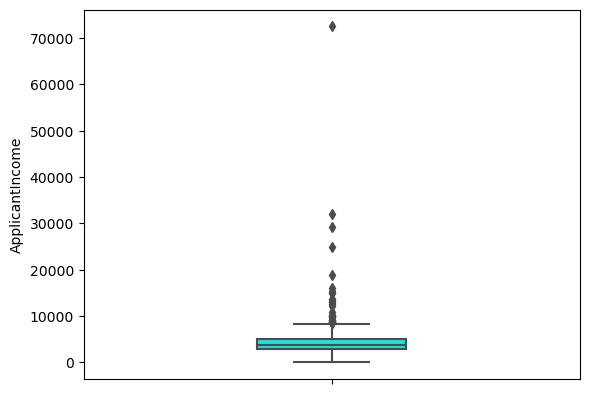

In [142]:
sns.boxplot(y = 'ApplicantIncome', data = df2,width = 0.3, color = 'cyan');

# Observations:
    
- The Range of the data, it means the difference between maximum and minimum Applicant Income is from 0 to 8500 approximately.
- The Inter Quartile Range is in between 2500 to 5000 approximately, it means the middle 50% of the Applicant Income data is in between 2500 to 5000 approximately.
- Above 8500 of the Applicant Income, all data points are considered as Outliers.

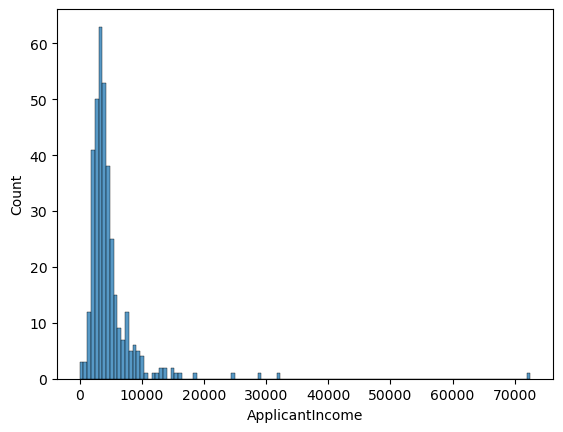

In [143]:
sns.histplot(x = 'ApplicantIncome', data = df2);

# Observations:
    
- Applicant Income follows Right-Skewed Distribution (or) Positive Skewness.
- Most of the Applicant income is under 10000 only.
- Applicant Income has huge number of Outliers on right side.

# Bivariate Analysis:

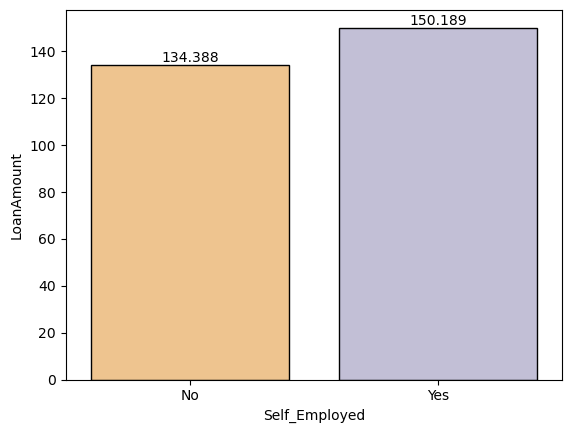

In [113]:
f = sns.barplot(x ='Self_Employed', y = 'LoanAmount', data = df2, palette = 'PuOr', edgecolor ='k', ci = None)
for i in f.containers:
    f.bar_label(i);

# Observation:
    
- Loan Amount for Self Employed People is more as compared to Non-Self Employed People.

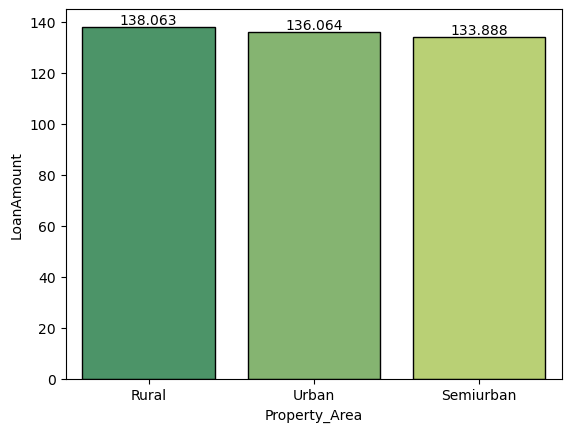

In [114]:
g = sns.barplot(y ='LoanAmount', x = 'Property_Area', data = df2, order = ['Rural', 'Urban', 'Semiurban'], palette ='summer',edgecolor = 'k', ci = None)
for i in g.containers:
    g.bar_label(i);

# Observation:
    
- Loan Amount for Rural People is more as compared to other People.

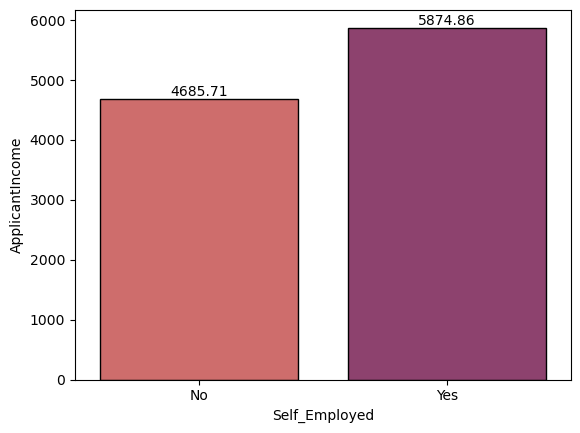

In [115]:
h = sns.barplot(x ='Self_Employed', y = 'ApplicantIncome', data = df2, palette = 'flare', ec = 'k', ci = None)
for i in h.containers:
    h.bar_label(i);

# Observation:
    
- Self_Employed People Income is more as compared to Non_Employed People Income.

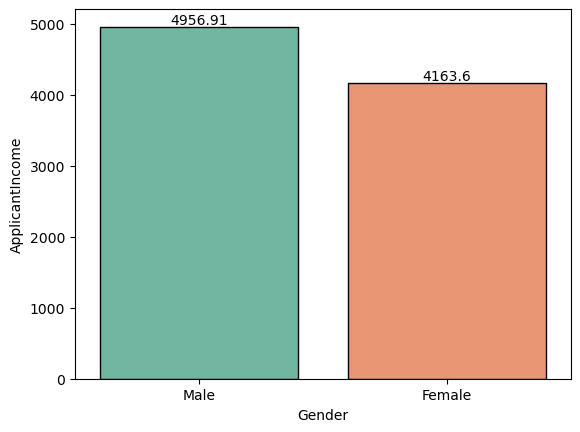

In [116]:
j = sns.barplot(x ='Gender', y = 'ApplicantIncome', data = df2, palette = 'Set2', ec = 'k', ci = None)
for i in j.containers:
    j.bar_label(i);

# Observation:
    
-  Males Income is more as compared to Females Income.

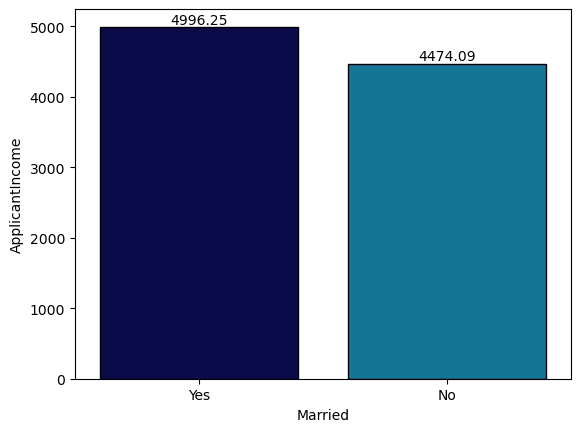

In [117]:
k = sns.barplot(x ='Married', y = 'ApplicantIncome', data = df2, palette = 'ocean', ec = 'k', ci = None)
for i in k.containers:
    k.bar_label(i);

# Observation:
    
- Married People Income is more as compared to singles Income.

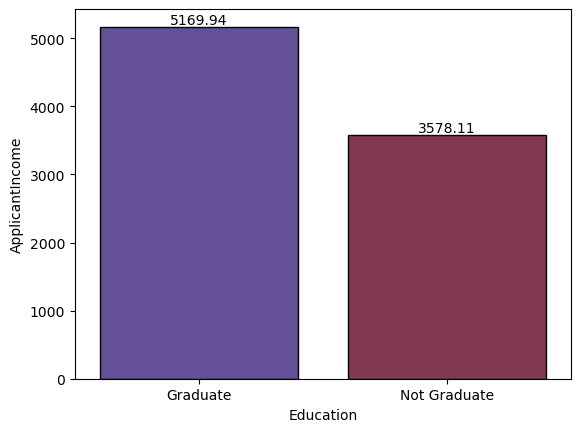

In [118]:
l = sns.barplot(x ='Education', y = 'ApplicantIncome', data = df2, palette = 'twilight', ec = 'k', ci = None)
for i in l.containers:
    l.bar_label(i);

# Observation:
    
- Graduates Income is more as compared to Non-Graduates Income.

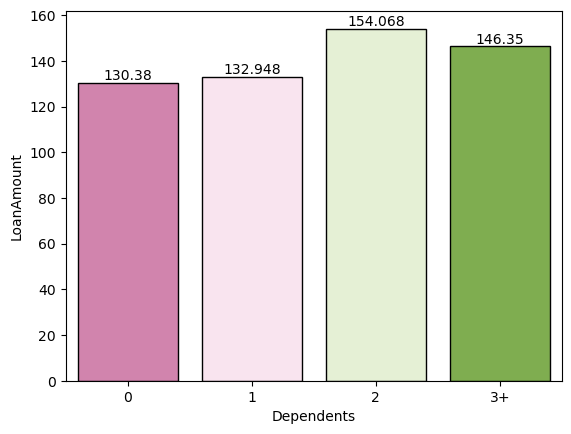

In [119]:
m = sns.barplot(x ='Dependents', y = 'LoanAmount', data = df2, palette = 'PiYG', edgecolor ='k', ci = None)
for i in m.containers:
    m.bar_label(i);

# Note:
    
- The more dependents you have, lesser will be the disposable income and it is likely that lesser will be your capacity to repay the loan.

# Observation:
    
- Highest Loan Amount is given to Applicant is having 2 dependents.
- Then for 3+ dependents, Loan amount is given more.

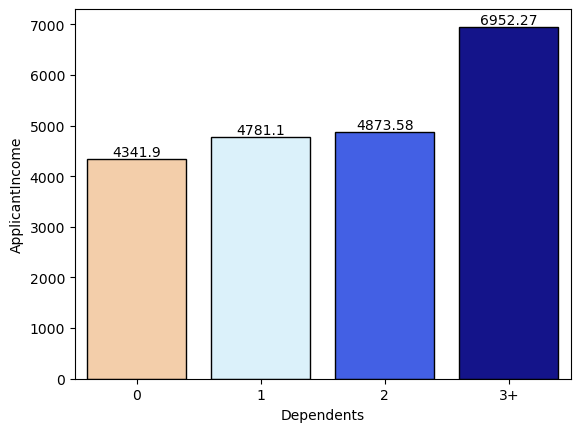

In [120]:
n = sns.barplot(x ='Dependents', y = 'ApplicantIncome', data = df2, palette = 'flag', edgecolor = 'k', ci = None)
for i in n.containers:
    n.bar_label(i);

# Observation:
    
- Income for Applicant who is having 3+ dependents is high.
- Applicant who has no dependents get less Income.

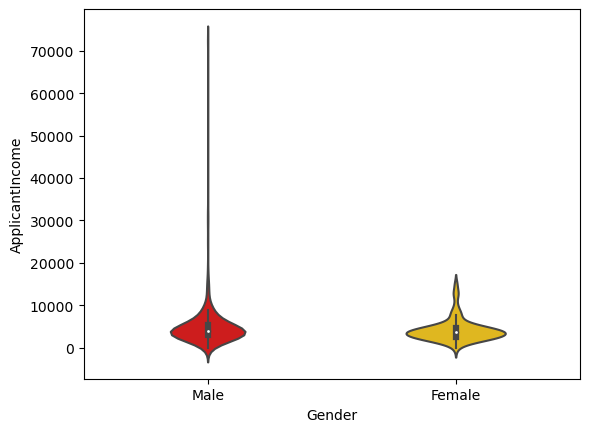

In [123]:
sns.violinplot(x = 'Gender', y = 'ApplicantIncome', data = df2,width = 0.4, palette = 'hot');

# Observation:
    
- Males have high Income as compared to Females.

C:\anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 49.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 35.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


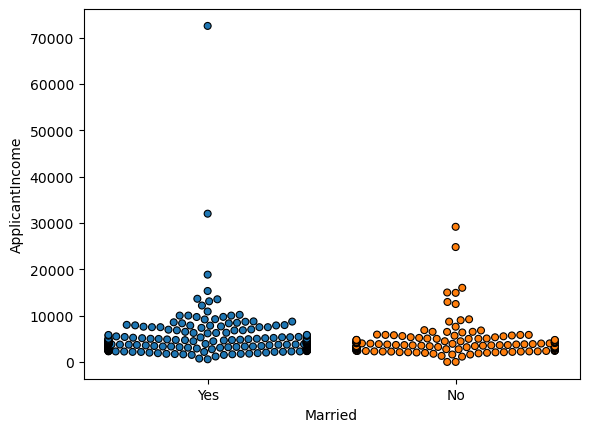

In [124]:
sns.swarmplot(x = 'Married', y = 'ApplicantIncome', data = df2, ec = 'k', linewidth = 0.8);

# Observation:
- Married People are having More Income as compared to Singles.

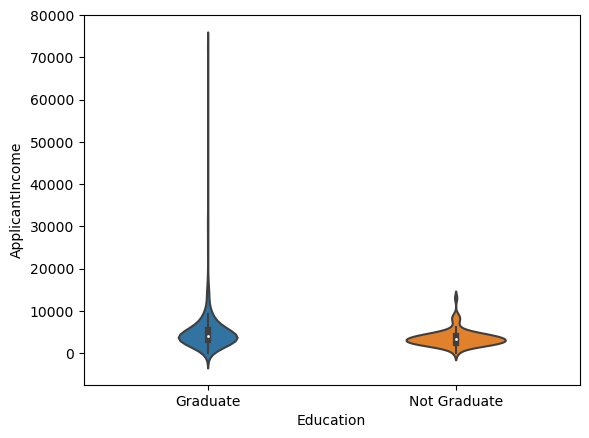

In [125]:
sns.violinplot(x = 'Education', y = 'ApplicantIncome', data = df2,width = 0.4);

# Observation:
    
- Graduates are having high Income as compared to Non Graduates.

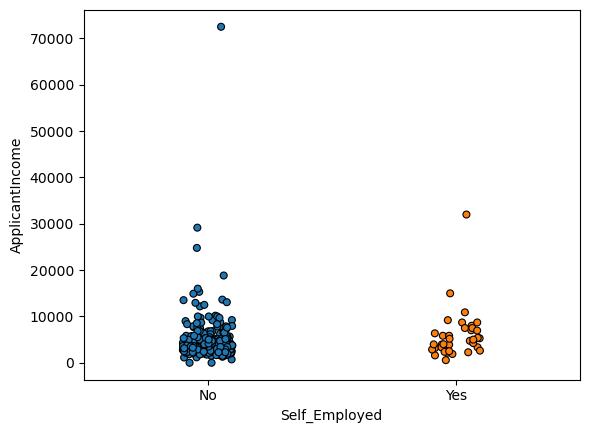

In [126]:
sns.stripplot(x = 'Self_Employed', y = 'ApplicantIncome', data = df2, jitter = 0.1, ec = 'k', linewidth = 0.8);

# Observation:
    
- More number of Non-Self Employed People are having Income as compared to Self-Employed People.

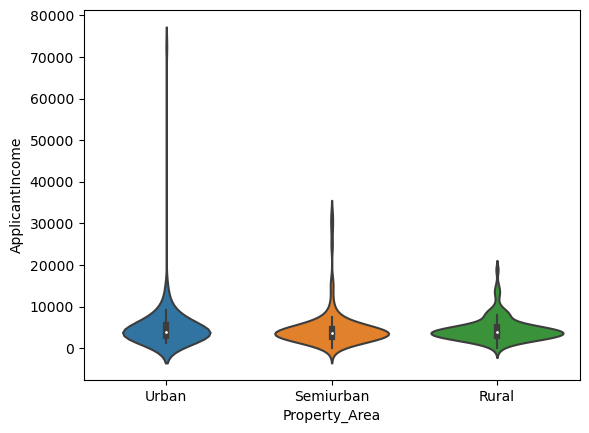

In [127]:
sns.violinplot(x = 'Property_Area', y = 'ApplicantIncome', data = df2,width = 0.8);

# Observation:
    
- Urban People are having high Income as compared to Rural and Semiurban People.

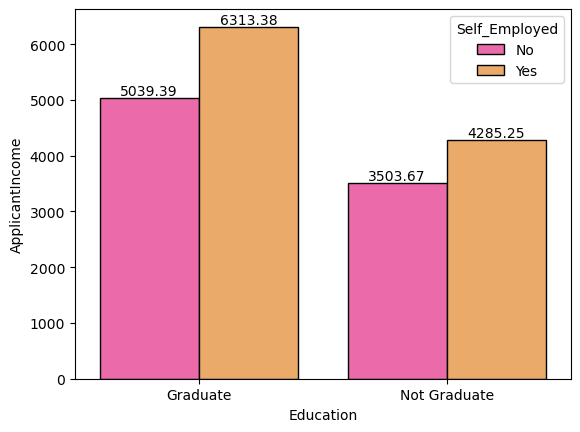

In [163]:
l = sns.barplot(x ='Education', y = 'ApplicantIncome', data = df2, hue = 'Self_Employed', palette = 'spring', ec = 'k', ci = None)
for i in l.containers:
    l.bar_label(i);

# Observations:
    
- Graduate who is Self_Employed is having More Income as compared to Graduate who is Non-Self Employed.
- Non Graduate who is Self_Employed is having More Income as compared to Non Graduate who is Non-Self Employed.

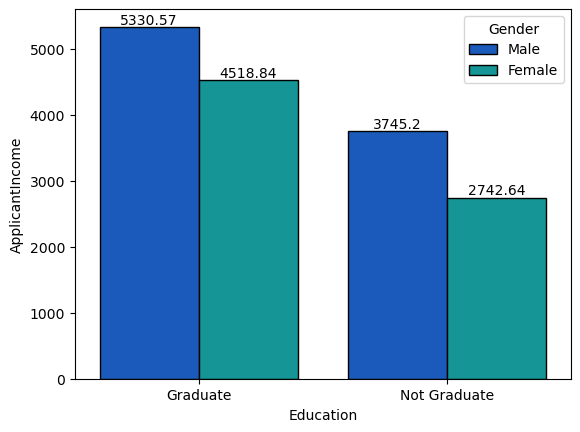

In [165]:
l = sns.barplot(x ='Education', y = 'ApplicantIncome', data = df2, hue = 'Gender', palette = 'winter', ec = 'k', ci = None)
for i in l.containers:
    l.bar_label(i);

# Observations:
    
- Male Graduates is having high Income as compared to Female Graduates.
- Male Non Graduates is having high Income as compared to Female Non Graduates.

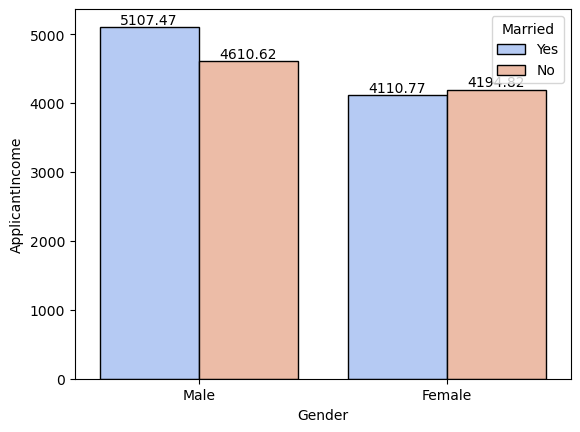

In [169]:
l = sns.barplot(x ='Gender', y = 'ApplicantIncome', data = df2, hue = 'Married', palette = 'coolwarm', ec = 'k', ci = None)
for i in l.containers:
    l.bar_label(i);

# Observations:
    
- Married Males have High Income as compared to Unmarried Males.
- Unmarried Females have High Income as compared to Married Females.